# Setup

## Colab

In [7]:
# # Mount the drive and move to dir
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Switch to current dir
%cd /content/drive/MyDrive/Coding/spread-res/runscr/

/content/drive/MyDrive/Coding/spread-res/runscr


## Imports

In [9]:
# Import importlib to reload modules and sys and os to add the path for other imports
import importlib
import sys
import os
import torch

# Append the parent directory to the path to import the necessary modules
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# Import the utilities and the dataloader
from utils import trainutil, inferutil, setuputil
from classes.models import BertPooler

# Now reload the modules to ensure they are up-to-date
importlib.reload(setuputil)
importlib.reload(trainutil)
importlib.reload(inferutil)
importlib.reload(BertPooler)

# Import the funcs needed from utils
from utils.setuputil import setup_config, display_config
from utils.trainutil import train_unified
from utils.inferutil import infer_one, infer_full, binfer_one, binfer_full

# Import the model
from classes.models.BertPooler import BertPooler

## Configuration

In [10]:
input_config = {

    # Environment and Model Info
    "env": "colab",
    "approach": "bert",
    "model_name": "BertPooler",
    "model_base": "bert-base-cased",

    # System Configuration
    "device": "cuda:0",
    "threads": 10,
    "seed": 0,

    # Data Configuration
    "data_dir": "../data",
    "data_ds": "manual",

    # Model Parameters
    "rows": 100,
    "cols": 100,
    "tokens": 32,

    # BERT Architecture Parameters
    "vocab_size": 30522,
    "hidden_size": 32,
    "num_hidden_layers": 1,
    "num_attention_heads": 1,
    "intermediate_size": 128,

    # Training Parameters
    "batch_size": 20,
    "lr": 1e-2,
    "mu": 0.25,
    "epochs": 10,
    "patience": 2,
    "save_int": 10,
    "save_dir": "../models/",
}
config = setup_config(input_config)
display_config(config)

# Define local variables from the config dictionary
DEVICE = config["DEVICE"]
THREADS = config["THREADS"]

# Data loaders and vocab
train_loader = config["train_loader"]
val_loader = config["val_loader"]
test_loader = config["test_loader"]
tokenizer = config["tokenizer"]
model_base = config["model_base"]

# Training parameters
batch_size = config["batch_size"]
lr = config["lr"]
mu = config["mu"]
epochs = config["epochs"]
patience = config["patience"]
save_int = config["save_int"]
save_dir = config["save_dir"]
save_name = config["save_name"]

Processing files: 100%|██████████| 40/40 [00:04<00:00,  8.98it/s]



40(P) = 40(G) + 0(E)


Processing files: 100%|██████████| 5/5 [00:00<00:00, 6389.86it/s]



5(P) = 5(G) + 0(E)


Processing files: 100%|██████████| 5/5 [00:00<00:00, 3163.13it/s]



5(P) = 5(G) + 0(E)
{
  "env": "colab",
  "approach": "bert",
  "DEVICE": "<device>",
  "THREADS": 10,
  "seed": 0,
  "model_base": "bert-base-cased",
  "model_name": "BertPooler",
  "rows": 100,
  "cols": 100,
  "tokens": 32,
  "data_ds": "manual",
  "data_dir": "../data",
  "train_dir": "../data/manual_train",
  "val_dir": "../data/manual_val",
  "test_dir": "../data/manual_test",
  "tokenizer": "<BertTokenizerFast>",
  "vocab_size": 30522,
  "hidden_size": 32,
  "num_hidden_layers": 1,
  "num_attention_heads": 1,
  "intermediate_size": 128,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "attention_probs_dropout_prob": 0.1,
  "max_position_embeddings": 64,
  "type_vocab_size": 2,
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-12,
  "pad_token_id": 0,
  "gradient_checkpointing": false,
  "train_loader": "<LoaderBert>",
  "val_loader": "<LoaderBert>",
  "test_loader": "<LoaderBert>",
  "batch_size": 20,
  "lr": 0.01,
  "mu": 0.25,
  "epochs": 10,
  "patience": 2,
  "save_

# Model Creation

In [ ]:
# 1) Create model and move to GPU Observe its architecture - 440 Mib
untrained_model = BertPooler(config).to(DEVICE)
print(untrained_model)

BertPooler(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 32, padding_idx=0)
      (position_embeddings): Embedding(64, 32)
      (token_type_embeddings): Embedding(2, 32)
      (LayerNorm): LayerNorm((32,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=32, out_features=32, bias=True)
              (key): Linear(in_features=32, out_features=32, bias=True)
              (value): Linear(in_features=32, out_features=32, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=32, out_features=32, bias=True)
              (LayerNorm): LayerNorm((32,), eps=1e-12, elementwise_affine=True)
           

# Model Training

In [11]:
# Train with adjusted batch size
trained_model = train_unified(
    untrained_model,
    train_loader,
    val_loader,
    DEVICE,
    batch_size=batch_size,
    lr=lr,
    mu=mu,
    max_epochs=epochs,
    patience=patience,
    save_int=save_int,
    save_dir=save_dir,
    save_name=save_name,
    config=config,
)

Epoch 0


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.74s/it]


Train Loss: 1.3818287253379822, Perplexity: 1.0000276369564005
Val Loss: 1.3705637454986572, Perplexity: 1.0000274116506025


Epoch 1


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.94s/it]


Train Loss: 1.3775553107261658, Perplexity: 1.0000275514857497
Val Loss: 1.319332480430603, Perplexity: 1.0000263869977393


Epoch 2


Validation Processing: 100%|██████████| 1/1 [00:16<00:00, 16.13s/it]


Train Loss: 1.2550902366638184, Perplexity: 1.0000251021197861
Val Loss: 0.8741832375526428, Perplexity: 1.0000174838175913


Epoch 3


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.89s/it]


Train Loss: 0.8362670838832855, Perplexity: 1.000016725481547
Val Loss: 0.5823318362236023, Perplexity: 1.0000116467045468


Epoch 4


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.94s/it]


Train Loss: 0.5888148546218872, Perplexity: 1.0000117763664333
Val Loss: 0.44158005714416504, Perplexity: 1.0000088316401416


Epoch 5


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.95s/it]


Train Loss: 0.44739750027656555, Perplexity: 1.0000089479900385
Val Loss: 0.35848987102508545, Perplexity: 1.0000071698231237


Epoch 6


Validation Processing: 100%|██████████| 1/1 [00:16<00:00, 16.12s/it]


Train Loss: 0.3667089343070984, Perplexity: 1.0000073342055813
Val Loss: 0.303597629070282, Perplexity: 1.0000060719710158


Epoch 7


Validation Processing: 100%|██████████| 1/1 [00:16<00:00, 16.12s/it]


Train Loss: 0.3142270892858505, Perplexity: 1.0000062845615334
Val Loss: 0.26417288184165955, Perplexity: 1.0000052834715942


Epoch 8


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 16.00s/it]


Train Loss: 0.27351202070713043, Perplexity: 1.000005470255376
Val Loss: 0.2339583933353424, Perplexity: 1.000004679178814


Epoch 9


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.97s/it]


Train Loss: 0.24244999885559082, Perplexity: 1.0000048490117335
Val Loss: 0.2099905014038086, Perplexity: 1.0000041998188474

Model Saved


TRAINING DONE at epoch 9, best epoch 9
Train Loss = 0.24244999885559082, Perplexity = 1.0000048490117335
Val Loss = 0.2099905014038086, Perplexity = 1.0000041998188474



Filename: ../data/manual_train/dlportfolio-by-debt-size.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(0,0): 0.90741246938705444336
(5,3): 0.90741306543350219727
(5,0): 0.90741312503814697266
(5,2): 0.90741324424743652344
(4,4): 0.90741342306137084961
(4,12): 0.90741461515426635742
(4,8): 0.90741509199142456055
(4,6): 0.90741527080535888672
(4,10): 0.90741539001464843750
(4,14): 0.90741598606109619141
(4,18): 0.90741670131683349609
(4,16): 0.90741693973541259766
(7,1): 0.90741765499114990234
(6,1): 0.90741777420043945312
(9,1): 0.90741783380508422852
(4,2): 0.90741860866546630859
(6,0): 0.90741884708404541016
(11,0): 0.90741902589797973633

NB to B ratio: Predicted = 9910:90 | Actual = 9912:88
Accuracy: 99.98% | Precision: 97.78% | Recall: 100.00% | F1-Score: 0.99



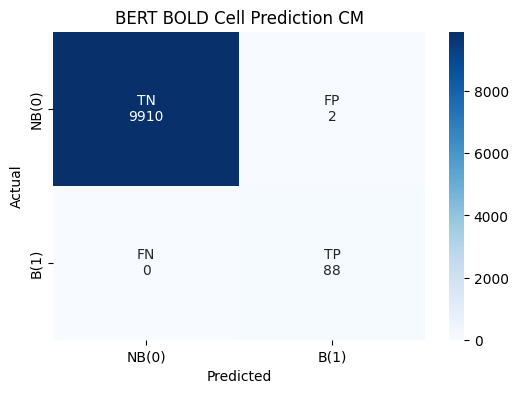


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
# Params
loc = 0
thresh = 0.9
cond = '>'
disp_max=True

# inference on single position of train loader params
binfer_one(
    trained_model,
    train_loader,
    loc=loc,
    threshold=thresh,
    condition=cond,
    disp_max=disp_max,
    device=DEVICE
)


Filename: ../data/manual_val/ffelbydefermenttype.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(0,0): 0.90739363431930541992
(6,3): 0.90741276741027832031
(6,0): 0.90741312503814697266
(6,2): 0.90741324424743652344
(5,2): 0.90741473436355590820
(5,4): 0.90741580724716186523
(5,6): 0.90741640329360961914
(5,16): 0.90741735696792602539
(7,1): 0.90741765499114990234
(10,1): 0.90741777420043945312
(9,1): 0.90741783380508422852
(7,0): 0.90741837024688720703
(11,0): 0.90741854906082153320
(5,8): 0.90741872787475585938
(5,12): 0.90741884708404541016
(5,14): 0.90741890668869018555
(23,0): 0.90741902589797973633
(5,10): 0.90741920471191406250

NB to B ratio: Predicted = 9895:105 | Actual = 9896:104
Accuracy: 99.99% | Precision: 99.05% | Recall: 100.00% | F1-Score: 1.00



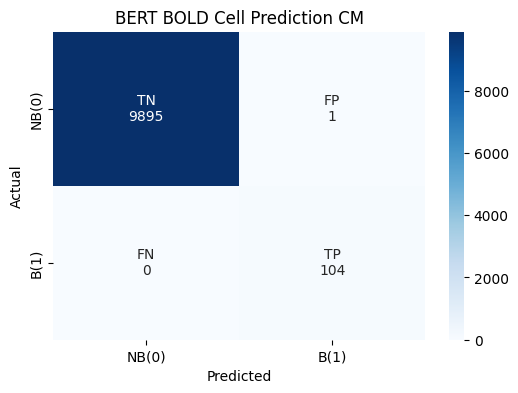


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
binfer_one(
    trained_model,
    val_loader,
    loc=loc,
    threshold=thresh,
    condition=cond,
    disp_max=disp_max,
    device=DEVICE
)


Filename: ../data/manual_test/dlportfoliobyrepaymentplan.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(5,18): 0.89746415615081787109
(5,4): 0.90604424476623535156
(5,2): 0.90673643350601196289
(5,16): 0.90685135126113891602
(5,14): 0.90711838006973266602
(5,8): 0.90737211704254150391
(5,6): 0.90739047527313232422
(6,3): 0.90741276741027832031
(6,0): 0.90741312503814697266
(6,2): 0.90741324424743652344
(0,0): 0.90741443634033203125
(5,12): 0.90741676092147827148
(5,10): 0.90741747617721557617
(9,1): 0.90741765499114990234
(8,1): 0.90741777420043945312
(7,1): 0.90741783380508422852
(13,0): 0.90741837024688720703
(17,0): 0.90741854906082153320
(7,0): 0.90741884708404541016
(5,20): 0.90741890668869018555
(29,0): 0.90741902589797973633

NB to B ratio: Predicted = 9842:158 | Actual = 9872:128
Accuracy: 99.66% | Precision: 79.75% | Recall: 98.44% | F1-Score: 0.88



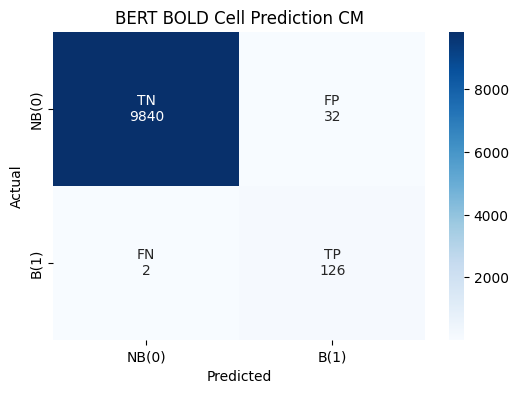


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
8,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
10,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
12,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
binfer_one(
    trained_model,
    test_loader,
    loc=loc,
    threshold=thresh,
    condition=cond,
    disp_max=disp_max,
    device=DEVICE
)

Batch Inference: 100%|██████████| 1/1 [00:16<00:00, 16.17s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 396665:3335 | Actual = 396714:3286
Accuracy: 99.99% | Precision: 98.53% | Recall: 100.00% | F1-Score: 0.99



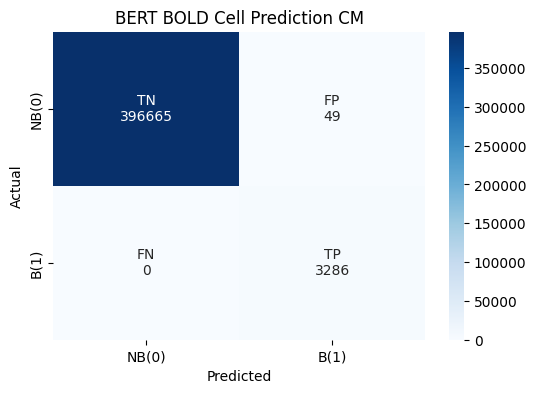

In [23]:
binfer_full(
    trained_model=trained_model,
    infer_loader=train_loader,
    batch_size=40,
    threshold=thresh,
    device=DEVICE
)

Batch Inference: 100%|██████████| 1/1 [00:15<00:00, 15.58s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 49597:403 | Actual = 49602:398
Accuracy: 99.99% | Precision: 98.76% | Recall: 100.00% | F1-Score: 0.99



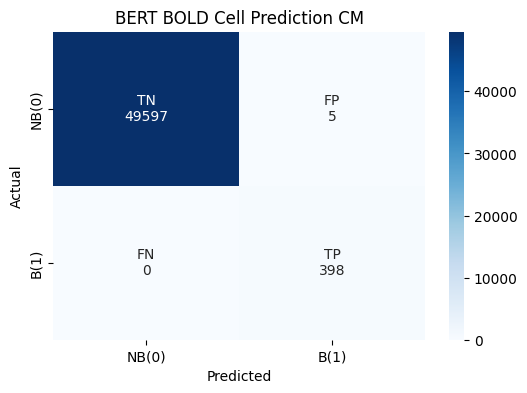

In [24]:
binfer_full(
    trained_model=trained_model,
    infer_loader=val_loader,
    batch_size=10,
    threshold=thresh,
    device=DEVICE
)

Batch Inference: 100%|██████████| 1/1 [00:15<00:00, 15.59s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 49571:429 | Actual = 49606:394
Accuracy: 99.92% | Precision: 91.38% | Recall: 99.49% | F1-Score: 0.95



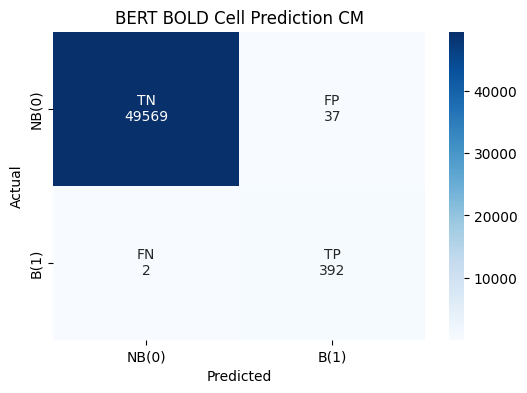

In [25]:
binfer_full(
    trained_model=trained_model,
    infer_loader=test_loader,
    batch_size=10,
    threshold=thresh,
    device=DEVICE
)